In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

Text(0.5, 1.0, 'Célula infectada de malaria')

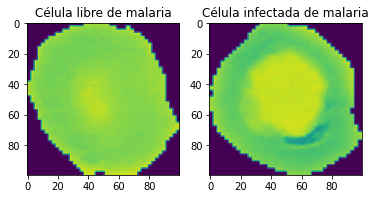

In [2]:
infectadas = glob.glob('Infectadas/*.png')
sanas = glob.glob('Sanas/*.png')

plt.subplot(1,2,1)
a = plt.imread(sanas[np.random.randint(0,len(sanas))])
plt.imshow(np.mean(a,axis=2))
plt.title('Célula libre de malaria')

plt.subplot(1,2,2)
a = plt.imread(infectadas[np.random.randint(0,len(infectadas))])
plt.imshow(np.mean(a,axis=2))
plt.title('Célula infectada de malaria')

In [3]:
target = []
imagenes = []
i=0

for archivo in infectadas:
    imagen = plt.imread(archivo)
    #imagen = np.mean(imagen,axis=2) #Cambia a monocromático
    imagenes.append(imagen.reshape(30000))
    target.append(1)
    i+=1
        
j=0
for archivo in sanas:
    imagen = plt.imread(archivo)
    #imagen = np.mean(imagen,axis=2) #Cambia a monocromático
    imagenes.append(imagen.reshape(30000))
    target.append(0)
    j+=1

In [4]:
X = np.array(imagenes)
Y = np.array(target)

indices = np.arange(len(Y))
np.random.shuffle(indices)

X = X[indices]
Y = Y[indices]
img = X.reshape((len(Y),100,100,3))

scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [5]:
muestreo_C = np.logspace(-5,2,30)
f1_l1 = []
coefs_l1 = []
f1_l2 = []
coefs_l2 = []

for c in muestreo_C:
    clf = LogisticRegression(C=c / len(x_train), penalty='l1', solver='saga', tol=0.1)
    clf.fit(x_train, y_train)
    coefs_l1.append(clf.coef_.copy()[0])
    f1_l1.append(metrics.f1_score(y_test,clf.predict(x_test)))
    
    clf = LogisticRegression(C=c / len(x_train), penalty='l2', solver='saga', tol=0.1)
    clf.fit(x_train, y_train)
    coefs_l2.append(clf.coef_.copy()[0])
    f1_l2.append(metrics.f1_score(y_test,clf.predict(x_test)))

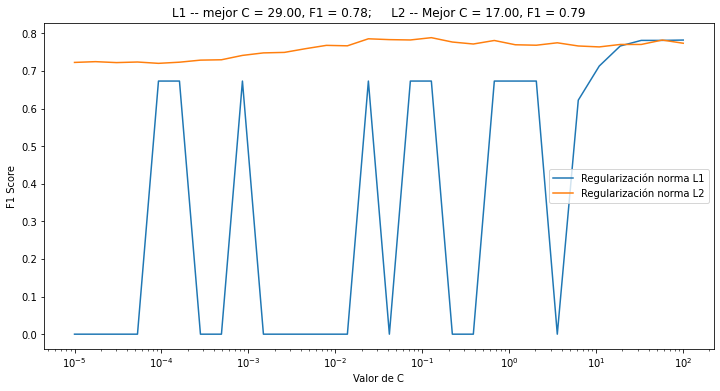

In [6]:
mejorC_l1 = np.argmax(f1_l1)
mejorC_l2 = np.argmax(f1_l2)
mejorF1_l1 = np.amax(f1_l1)
mejorF1_l2 = np.amax(f1_l2)

plt.figure(figsize=(12,6))
plt.plot(muestreo_C,f1_l1,label='Regularización norma L1')
plt.plot(muestreo_C,f1_l2,label='Regularización norma L2')
plt.legend()
plt.xscale('log')
plt.ylabel('F1 Score')
plt.xlabel('Valor de C')
plt.title('L1 -- mejor C = {:.2f}, F1 = {:.2f};     L2 -- Mejor C = {:.2f}, F1 = {:.2f}'.format(mejorC_l1,mejorF1_l1,mejorC_l2,mejorF1_l2))

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


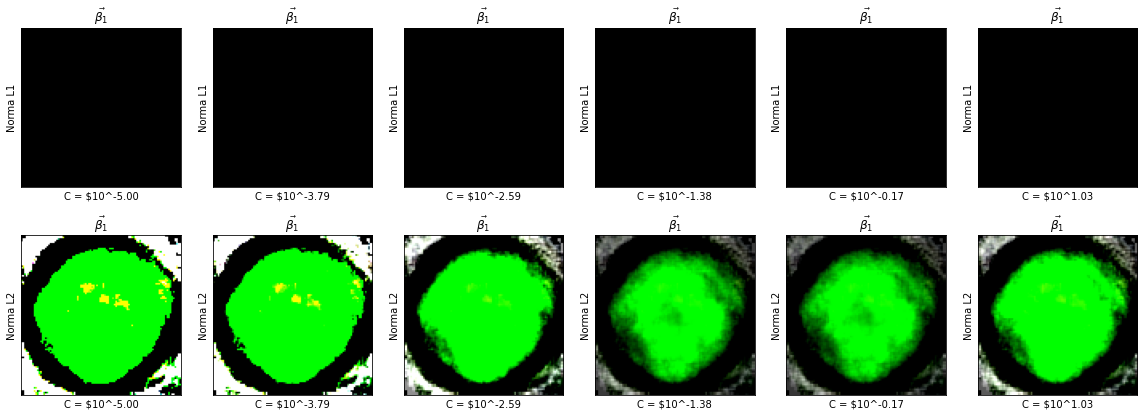

In [7]:
import warnings
warnings.filterwarnings('ignore') # Omitir los warnings

muestra = muestreo_C[::5]
c_l1 = coefs_l1[::5]
c_l2 = coefs_l2[::5]

plt.figure(figsize=(20,7))
for i in range(len(muestra)):
    
    scale = np.abs(c_l1[i]).max()
    l1_plot = plt.subplot(2,6, i + 1)
    l1_plot.imshow(coefs_l1[i].reshape(100,100,3)/scale*255)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('C = $10^{:.2f}'.format(np.log10(muestra[i])))
    l1_plot.set_ylabel('Norma L1')
    l1_plot.set_title(r'$\vec{\beta_1}$')
    
    scale = np.abs(c_l2[i]).max()
    l2_plot = plt.subplot(2,6, i + 7)
    l2_plot.imshow(coefs_l2[i].reshape(100,100,3)/scale*255)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('C = $10^{:.2f}'.format(np.log10(muestra[i])))
    l2_plot.set_ylabel('Norma L2')
    l2_plot.set_title(r'$\vec{\beta_1}$')


## Discusión
Como se observa de las figuras anteriores, la regulación L1 tiende a hacer que el vector de resultados termine siendo 0 en todas las componentes, lo que resulta en los valores de F1 = 0 de la gráfica anterior. Sin embargo, para esta norma hay algunos valores de C que si dan como resultado modelos con vectores distintos de cero, y estos presentan scores F1 bastante buenos.

En cualquier caso, la norma L2 parece más apropiada para este problema, dando valores de F1 más altos.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


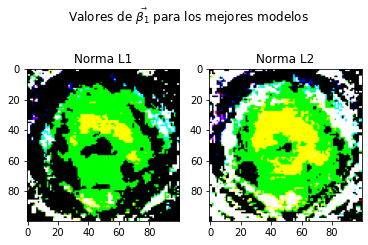

In [9]:
scale = np.abs(coefs_l1[np.argmax(f1_l1)]).max()
plt.subplot(1,2,1)
plt.imshow(coefs_l1[np.argmax(f1_l1)].reshape((100,100,3))/scale*255)
plt.title('Norma L1')

scale = np.abs(coefs_l2[np.argmax(f1_l2)]).max()
plt.subplot(1,2,2)
plt.imshow(coefs_l2[np.argmax(f1_l2)].reshape((100,100,3))/scale*255)
plt.title('Norma L2')
plt.suptitle(r'Valores de $\vec{\beta_1}$ para los mejores modelos')

plt.show()